In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
def load_folder(folder_path):
    dfs = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            full_path = os.path.join(folder_path, file)
            df = pd.read_csv(full_path)
            df["source_file"] = file
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)
small_path = "/content/drive/MyDrive/Propeller/SmallPropeller"
big_path = "/content/drive/MyDrive/Propeller/Bigpropeller"

df_small = load_folder(small_path)
df_big = load_folder(big_path)
def print_dataset_stats(df, name):
    print("=" * 60)
    print(f"Dataset: {name}")
    print("=" * 60)

    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumn names:")
    print(list(df.columns))

    print("\nMissing values per column:")
    print(df.isna().sum())

    print("\nBasic statistics:")
    print(df.describe())

    print("\n" + "=" * 60 + "\n")
print_dataset_stats(df_small, "Small Propeller Dataset")
print_dataset_stats(df_big, "Large Propeller Dataset")


Dataset: Small Propeller Dataset
Number of rows: 474472
Number of columns: 8

Column names:
['J', 'pitch', 'CT', 'source_file', 'V', 'Thrust', 'diameter', 'rpm']

Missing values per column:
J              180993
pitch               0
CT             180993
source_file         0
V              293479
Thrust         293479
diameter       293479
rpm            293479
dtype: int64

Basic statistics:
                   J          pitch             CT              V  \
count  293479.000000  474472.000000  293479.000000  180993.000000   
mean        0.084710       7.517804       0.017761      55.639334   
std         0.093947       3.390050       0.009989      45.209106   
min        -0.010668       2.000000      -0.004683     -42.000000   
25%         0.021613       4.600000       0.010154      19.600000   
50%         0.052106       7.000000       0.018855      45.200000   
75%         0.111404      10.000000       0.024484      81.700000   
max         0.798576      22.500000       0.071890

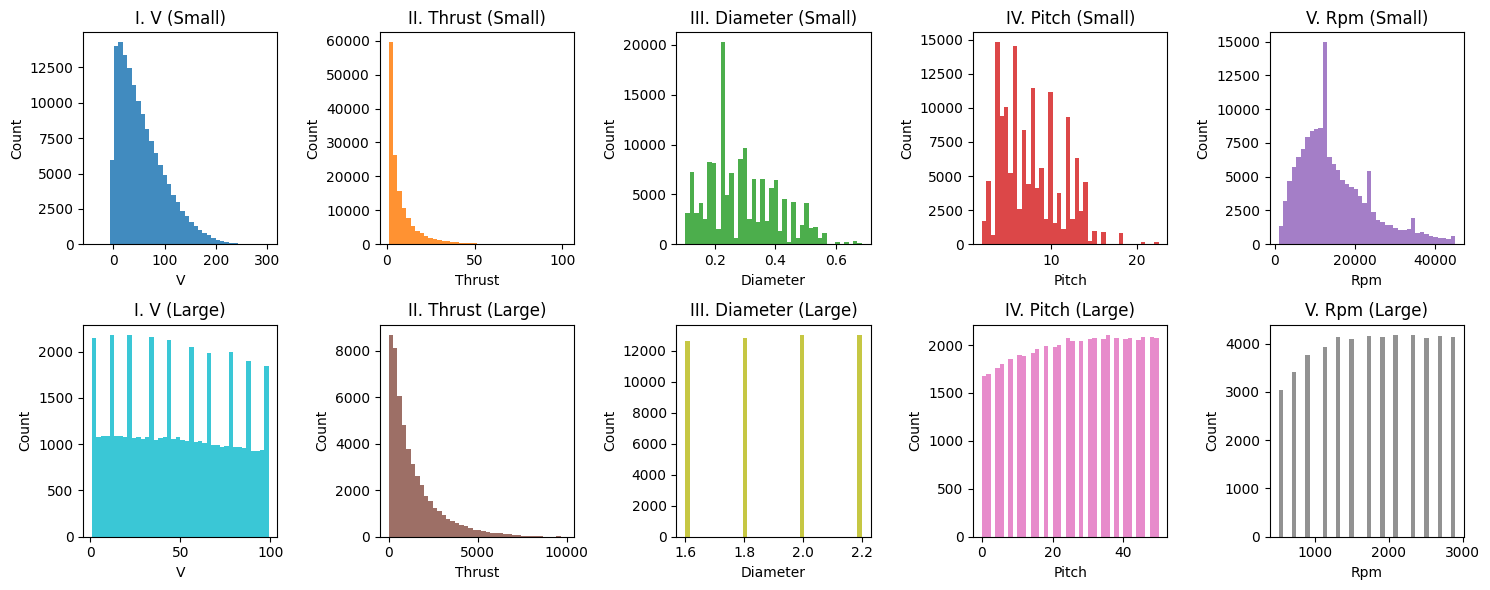

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
small_df = pd.read_csv("/content/drive/MyDrive/Propeller/SmallPropeller/smallpropeller_train.csv")
big_df   = pd.read_csv("/content/drive/MyDrive/Propeller/Bigpropeller/bigpropeller_train.csv")

# Common features to align vertically
features = ["V", "Thrust", "diameter", "pitch", "rpm"]
features = [f for f in features if f in small_df.columns and f in big_df.columns]

n = len(features)

# Distinct colors
colors_small = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
colors_big   = ["tab:cyan", "tab:brown", "tab:olive", "tab:pink", "tab:gray"]

roman = ["I", "II", "III", "IV", "V", "VI", "VII"]

fig, axes = plt.subplots(2, n, figsize=(3*n, 6), sharex=False)

for i, feat in enumerate(features):

    title_feat = feat.capitalize()   # Capitalize first letter only

    # ---- Small dataset ----
    ax = axes[0, i]
    ax.hist(small_df[feat].dropna(), bins=40, color=colors_small[i], alpha=0.85)
    ax.set_title(f"{roman[i]}. {title_feat} (Small)")
    ax.set_ylabel("Count")
    ax.set_xlabel(title_feat)

    # ---- Big dataset ----
    ax = axes[1, i]
    ax.hist(big_df[feat].dropna(), bins=40, color=colors_big[i], alpha=0.85)
    ax.set_title(f"{roman[i]}. {title_feat} (Large)")
    ax.set_ylabel("Count")
    ax.set_xlabel(title_feat)

plt.tight_layout()
plt.savefig("paired_2xN_dataset_stats.png", dpi=300)
plt.show()
plt.close()


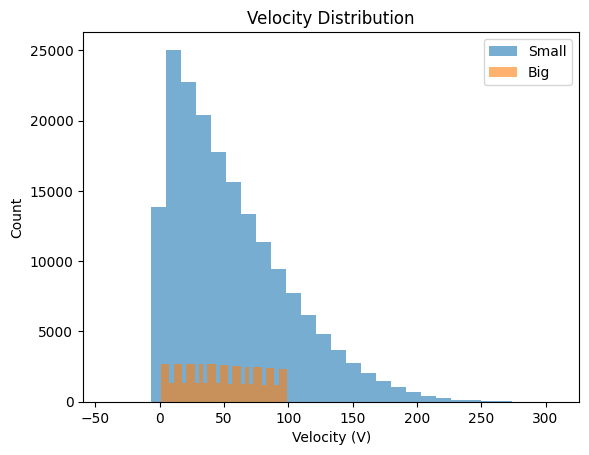

In [ ]:
plt.figure()
plt.hist(df_small["V"], bins=30, alpha=0.6, label="Small")
plt.hist(df_big["V"], bins=30, alpha=0.6, label="Big")
plt.xlabel("Velocity (V)")
plt.ylabel("Count")
plt.legend()
plt.title("Velocity Distribution")
plt.show()


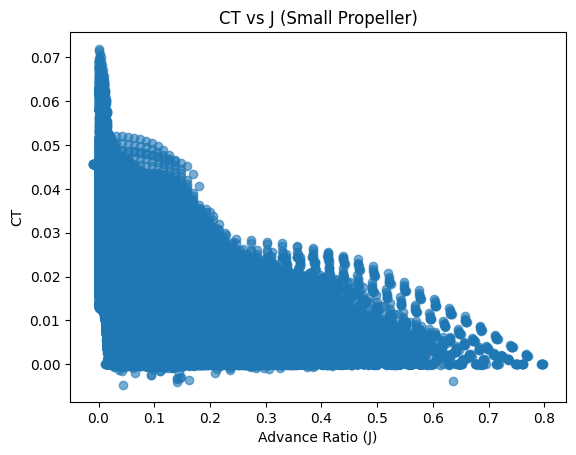

In [ ]:
if "CT" in df_small.columns:
    plt.figure()
    plt.scatter(df_small["J"], df_small["CT"], alpha=0.6)
    plt.xlabel("Advance Ratio (J)")
    plt.ylabel("CT")
    plt.title("CT vs J (Small Propeller)")
    plt.show()


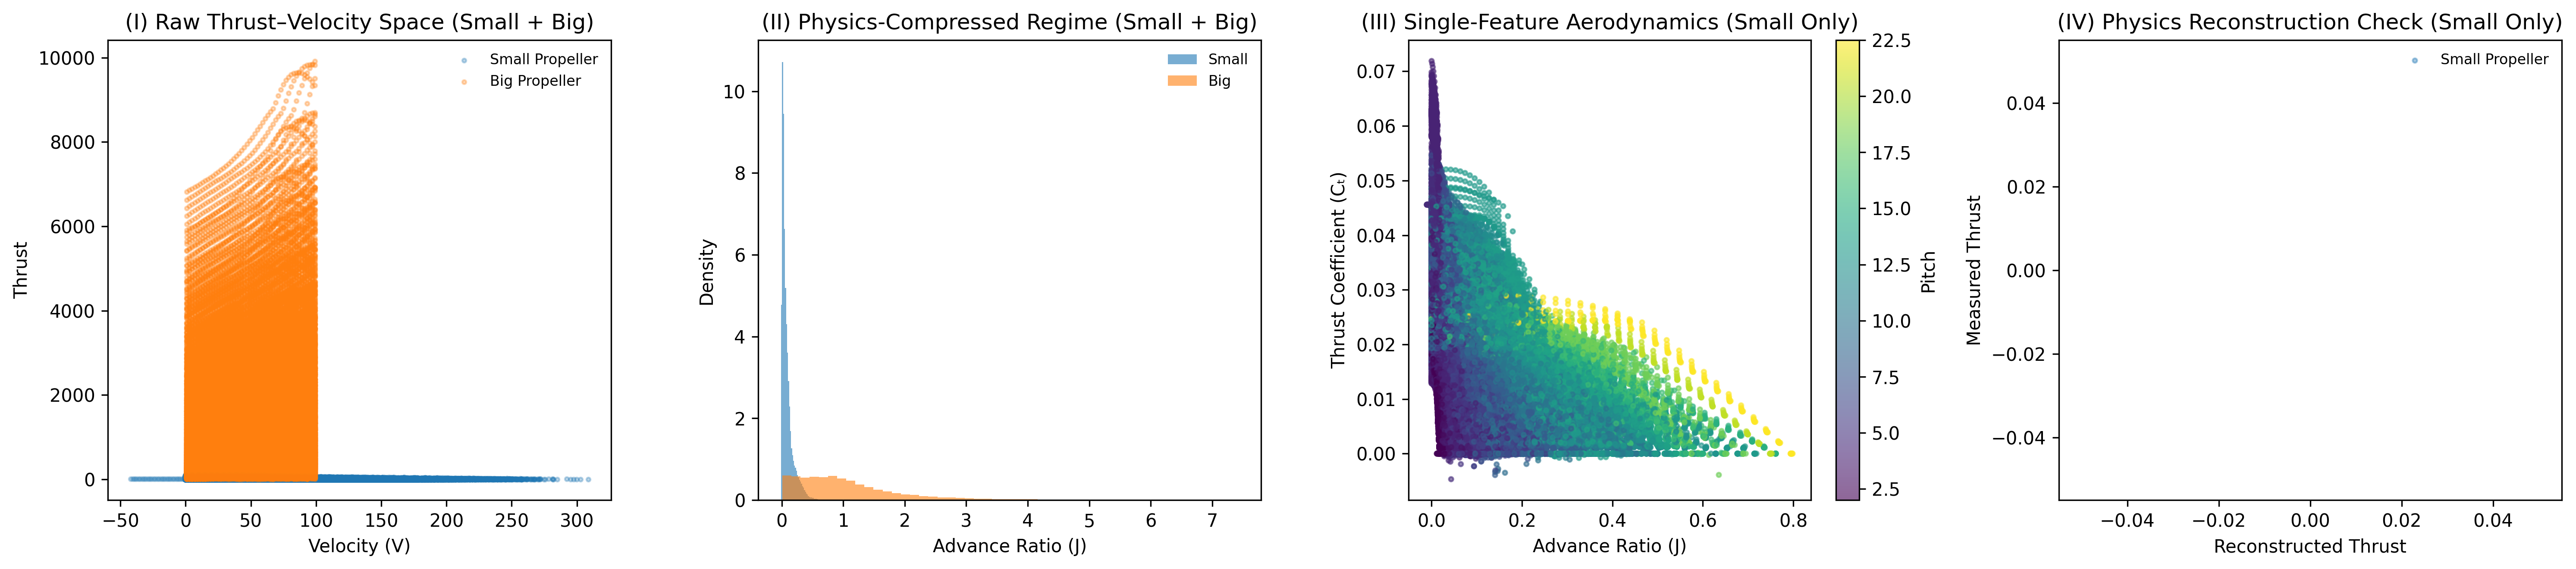

In [ ]:
"""
Figure: Cross-Scale Physics-Compressed Operating Envelopes
Purpose:
This figure provides a unified visual justification for the PCFM-DS architecture by
(1) exposing raw scale mismatch,
(2) demonstrating physics-based feature alignment,
(3) validating single-feature aerodynamic learnability, and
(4) confirming physics-consistent thrust reconstruction.
"""

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Ensure advance ratio J exists for both datasets (physics compression)
# ------------------------------------------------------------------
def ensure_advance_ratio(df):
    if "J" not in df.columns:
        df = df.copy()
        n = df["rpm"] / 60.0
        df["J"] = df["V"] / (n * df["diameter"])
    return df

df_small = ensure_advance_ratio(df_small)
df_big   = ensure_advance_ratio(df_big)

# ------------------------------------------------------------------
# Create 1×4 horizontal figure (IEEE Transactions style)
# ------------------------------------------------------------------
fig, axes = plt.subplots(1, 4, figsize=(20, 4.5), dpi=300)

# ================================================================
# (A) Raw Thrust vs Velocity — illustrates cross-scale mismatch
# ================================================================
axes[0].scatter(
    df_small["V"], df_small["Thrust"],
    s=5, alpha=0.3, label="Small Propeller"
)
axes[0].scatter(
    df_big["V"], df_big["Thrust"],
    s=5, alpha=0.3, label="Big Propeller"
)
axes[0].set_xlabel("Velocity (V)")
axes[0].set_ylabel("Thrust")
axes[0].set_title("(A) Raw Thrust–Velocity Space")
axes[0].legend(frameon=False, fontsize=8)

# ================================================================
# (B) Advance Ratio Distribution — physics-based regime alignment
# ================================================================
axes[1].hist(
    df_small["J"].dropna(),
    bins=50, density=True, alpha=0.6, label="Small"
)
axes[1].hist(
    df_big["J"].dropna(),
    bins=50, density=True, alpha=0.6, label="Big"
)
axes[1].set_xlabel("Advance Ratio (J)")
axes[1].set_ylabel("Density")
axes[1].set_title("(B) Physics-Compressed Regime")
axes[1].legend(frameon=False, fontsize=8)

# ================================================================
# (C) Thrust Coefficient vs J — single-feature learnability
# ================================================================
sc = axes[2].scatter(
    df_small["J"],
    df_small["CT"],
    c=df_small["pitch"],
    cmap="viridis",
    s=6,
    alpha=0.6
)
axes[2].set_xlabel("Advance Ratio (J)")
axes[2].set_ylabel("Thrust Coefficient (Cₜ)")
axes[2].set_title("(C) Single-Feature Aerodynamics")

cbar = plt.colorbar(sc, ax=axes[2])
cbar.set_label("Pitch")

# ================================================================
# (D) Physics-Based Thrust Reconstruction — cascade validation
# ================================================================
rho = 1.225  # air density (kg/m^3)

def reconstruct_thrust(df):
    n = df["rpm"] / 60.0
    return df["CT"] * rho * n**2 * df["diameter"]**4

df_rec = df_small.dropna(subset=["CT"]).copy()
df_rec["T_reconstructed"] = reconstruct_thrust(df_rec)

axes[3].scatter(
    df_rec["T_reconstructed"],
    df_rec["Thrust"],
    s=6, alpha=0.4, label="Small Propeller"
)

# Ideal reconstruction reference line
t_min = df_rec["Thrust"].min()
t_max = df_rec["Thrust"].max()
axes[3].plot([t_min, t_max], [t_min, t_max], "--", linewidth=1)

axes[3].set_xlabel("Reconstructed Thrust")
axes[3].set_ylabel("Measured Thrust")
axes[3].set_title("(D) Physics Reconstruction Check")
axes[3].legend(frameon=False, fontsize=8)

axes[0].set_title("(I) Raw Thrust–Velocity Space (Small + Big)")
axes[1].set_title("(II) Physics-Compressed Regime (Small + Big)")
axes[2].set_title("(III) Single-Feature Aerodynamics (Small Only)")
axes[3].set_title("(IV) Physics Reconstruction Check (Small Only)")

# ------------------------------------------------------------------
# Final layout adjustment for publication
# ------------------------------------------------------------------
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# Full implementation: PCFM-DS + Ablations + Saved Artifacts
# Saves: .txt results, .joblib trained models, .png figures, .csv predictions
# Works in Google Colab with Drive-mounted paths.
# ============================================================

import os
import glob
import json
import time
import math
import shutil
from dataclasses import dataclass
from typing import Dict, Tuple, List, Optional

import numpy as np
import pandas as pd

import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# USER PATHS (as provided)
# -----------------------------
small_path = "/content/drive/MyDrive/Propeller/SmallPropeller"
big_path   = "/content/drive/MyDrive/Propeller/Bigpropeller"

# -----------------------------
# GLOBAL SETTINGS
# -----------------------------
RHO = 1.225  # kg/m^3 (air density)
SEED = 42
TEST_SIZE = 0.20
POLY_DEGREES = [2, 3]  # micro-model degrees for CT(J)
RAW_MODELS = {
    "linreg": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=SEED),
    "rf": RandomForestRegressor(
        n_estimators=200, random_state=SEED, n_jobs=-1,
        max_depth=None, min_samples_split=2, min_samples_leaf=1
    ),
}

# ============================================================
# Utilities: IO, logging, folder structure
# ============================================================

def now_tag() -> str:
    return time.strftime("%Y%m%d_%H%M%S")

RUN_ID = f"PCFM_RUN_{now_tag()}"
OUT_ROOT = os.path.join("/content/drive/MyDrive/Propeller", "PCFM_Results", RUN_ID)

DIRS = {
    "root": OUT_ROOT,
    "models": os.path.join(OUT_ROOT, "models"),
    "figs": os.path.join(OUT_ROOT, "figures"),
    "tables": os.path.join(OUT_ROOT, "tables"),
    "preds": os.path.join(OUT_ROOT, "predictions"),
    "logs": os.path.join(OUT_ROOT, "logs"),
}

for d in DIRS.values():
    os.makedirs(d, exist_ok=True)

def write_txt(path: str, text: str):
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)

def append_txt(path: str, text: str):
    with open(path, "a", encoding="utf-8") as f:
        f.write(text)

def save_json(path: str, obj):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, indent=2)

def fig_save(path: str):
    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches="tight")
    plt.close()

# ============================================================
# Physics helpers: M1 and M3
# ============================================================

def rpm_to_n(rpm: np.ndarray) -> np.ndarray:
    return rpm / 60.0

def compute_J(V: np.ndarray, D: np.ndarray, rpm: np.ndarray) -> np.ndarray:
    n = rpm_to_n(rpm)
    den = n * D
    J = np.where(den > 0, V / den, np.nan)
    return J

def thrust_from_CT(CT: np.ndarray, D: np.ndarray, rpm: np.ndarray, rho: float = RHO) -> np.ndarray:
    n = rpm_to_n(rpm)
    return CT * rho * (n**2) * (D**4)

def CT_from_thrust(T: np.ndarray, D: np.ndarray, rpm: np.ndarray, rho: float = RHO) -> np.ndarray:
    n = rpm_to_n(rpm)
    den = rho * (n**2) * (D**4)
    CT = np.where(den > 0, T / den, np.nan)
    return CT

# ============================================================
# Data loading: robust CSV discovery
# ============================================================

def find_csvs(root: str) -> List[str]:
    pats = [
        os.path.join(root, "*.csv"),
        os.path.join(root, "**", "*.csv"),
    ]
    files = []
    for p in pats:
        files.extend(glob.glob(p, recursive=True))
    files = sorted(list(set(files)))
    return files

def load_propeller_folder(root: str, label: str) -> pd.DataFrame:
    files = find_csvs(root)
    if len(files) == 0:
        raise FileNotFoundError(f"No CSV files found under: {root}")

    dfs = []
    for fp in files:
        try:
            df = pd.read_csv(fp)
            df["source_file"] = os.path.basename(fp)
            dfs.append(df)
        except Exception as e:
            # Log and skip unreadable files
            append_txt(os.path.join(DIRS["logs"], f"read_errors_{label}.txt"),
                       f"[SKIP] {fp}\n{repr(e)}\n\n")

    if len(dfs) == 0:
        raise RuntimeError(f"All CSV reads failed under: {root}")

    out = pd.concat(dfs, ignore_index=True)
    out["dataset_scale"] = label
    return out

# ============================================================
# Standardize columns
# Expect columns (case-insensitive): V, diameter, pitch, rpm, Thrust, CT, J
# ============================================================

def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    colmap = {c.lower(): c for c in df.columns}

    def pick(*names):
        for n in names:
            if n.lower() in colmap:
                return colmap[n.lower()]
        return None

    # candidate mappings
    Vc = pick("V", "velocity", "inflow_velocity")
    Dc = pick("diameter", "D", "prop_diameter")
    Pc = pick("pitch", "P")
    Rc = pick("rpm", "RPM")
    Tc = pick("Thrust", "T", "thrust_N", "thrust")
    CTc = pick("CT", "C_T", "ct")
    Jc  = pick("J", "advance_ratio", "j")

    # Create canonical columns
    out = df.copy()

    if Vc is not None:  out["V"] = pd.to_numeric(out[Vc], errors="coerce")
    if Dc is not None:  out["diameter"] = pd.to_numeric(out[Dc], errors="coerce")
    if Pc is not None:  out["pitch"] = pd.to_numeric(out[Pc], errors="coerce")
    if Rc is not None:  out["rpm"] = pd.to_numeric(out[Rc], errors="coerce")
    if Tc is not None:  out["Thrust"] = pd.to_numeric(out[Tc], errors="coerce")
    if CTc is not None: out["CT"] = pd.to_numeric(out[CTc], errors="coerce")
    if Jc is not None:  out["J"] = pd.to_numeric(out[Jc], errors="coerce")

    return out

# ============================================================
# Cleaning and derived features
# ============================================================

def prepare_df(df: pd.DataFrame, require_thrust: bool = True) -> pd.DataFrame:
    # Ensure canonical columns exist
    needed = ["diameter", "pitch", "rpm"]
    if require_thrust:
        needed.append("Thrust")
    for c in needed:
        if c not in df.columns:
            df[c] = np.nan

    # Some datasets may not have V; keep it but allow NaN for certain ablations
    if "V" not in df.columns:
        df["V"] = np.nan

    # Compute J if possible
    df["J_calc"] = compute_J(df["V"].to_numpy(), df["diameter"].to_numpy(), df["rpm"].to_numpy())
    if "J" not in df.columns:
        df["J"] = df["J_calc"]
    else:
        # Prefer provided J when present; fill gaps with computed
        df["J"] = df["J"].where(df["J"].notna(), df["J_calc"])

    # Compute CT if absent but thrust + (D,rpm) exist
    if "CT" not in df.columns:
        df["CT"] = np.nan
    df["CT_calc"] = CT_from_thrust(df["Thrust"].to_numpy(), df["diameter"].to_numpy(), df["rpm"].to_numpy())
    df["CT"] = df["CT"].where(df["CT"].notna(), df["CT_calc"])

    # drop impossible/invalid rows for core tasks
    # For thrust prediction tasks, need Thrust, diameter, rpm, pitch; V needed for Raw-ML and J
    core = df.copy()
    core = core.replace([np.inf, -np.inf], np.nan)

    # Enforce positive physical variables where required
    for c in ["diameter", "rpm"]:
        core.loc[core[c] <= 0, c] = np.nan

    # If thrust exists, allow thrust <= 0 (some datasets might include braking/negative thrust); keep
    if require_thrust:
        core = core[core["Thrust"].notna()]

    # Keep pitch as numeric, may be 0 or positive; if missing, drop
    core = core[core["pitch"].notna()]

    # If V missing, J is nan; keep row but many models will drop later
    core.reset_index(drop=True, inplace=True)
    return core

# ============================================================
# Metrics (as in study plan) + additional diagnostics
# ============================================================

def nte(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    denom = np.nanmax(np.abs(y_true)) if np.nanmax(np.abs(y_true)) > 0 else np.nan
    return float(np.nanmean(np.abs(y_pred - y_true) / denom)) if denom == denom else np.nan

def physics_consistency_error(CT_pred: np.ndarray, T_pred: np.ndarray, D: np.ndarray, rpm: np.ndarray) -> float:
    CT_recon = CT_from_thrust(T_pred, D, rpm, rho=RHO)
    return float(np.nanmean(np.abs(CT_pred - CT_recon)))

def extrapolation_safety_index(J_train: np.ndarray, J_test: np.ndarray) -> float:
    jmin = np.nanmin(J_train)
    jmax = np.nanmax(J_train)
    unsafe = np.logical_or(J_test < jmin, J_test > jmax)
    unsafe = unsafe[np.isfinite(J_test)]
    return float(np.mean(unsafe)) if unsafe.size else np.nan

def monotonic_consistency(J: np.ndarray, CT_pred: np.ndarray) -> float:
    # Simple derivative sign consistency over sorted J
    mask = np.isfinite(J) & np.isfinite(CT_pred)
    if mask.sum() < 5:
        return np.nan
    J_s = J[mask]
    CT_s = CT_pred[mask]
    idx = np.argsort(J_s)
    J_s = J_s[idx]
    CT_s = CT_s[idx]
    dCT = np.diff(CT_s)
    # Score: fraction of derivative signs that are consistent with the majority sign
    # (proxy for smooth/consistent trend without imposing a known monotone direction)
    signs = np.sign(dCT)
    signs = signs[signs != 0]
    if signs.size == 0:
        return 1.0
    maj = 1 if np.sum(signs > 0) >= np.sum(signs < 0) else -1
    return float(np.mean(signs == maj))

def compute_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    if mask.sum() == 0:
        return {"R2": np.nan, "MAE": np.nan, "NTE": np.nan}
    yt = y_true[mask]
    yp = y_pred[mask]
    return {
        "R2": float(r2_score(yt, yp)),
        "MAE": float(mean_absolute_error(yt, yp)),
        "NTE": float(nte(yt, yp)),
    }

# ============================================================
# Model builders
# ============================================================

def build_poly_reg(deg: int, ridge_alpha: Optional[float] = None):
    # 1D polynomial regression on J -> CT
    reg = Ridge(alpha=ridge_alpha, random_state=SEED) if ridge_alpha is not None else LinearRegression()
    return Pipeline([
        ("poly", PolynomialFeatures(degree=deg, include_bias=True)),
        ("reg", reg),
    ])

def build_raw_ml(model_name: str):
    # Raw-ML on [V, diameter, pitch, rpm] -> Thrust
    base = RAW_MODELS[model_name]
    # scale for linear models; keep RF unscaled
    if model_name in ["linreg", "ridge"]:
        return Pipeline([
            ("scaler", StandardScaler()),
            ("reg", base),
        ])
    return base

# ============================================================
# Train/eval routines for each ablation variant
# ============================================================

@dataclass
class EvalPack:
    name: str
    metrics: Dict[str, float]
    extra: Dict[str, float]
    y_pred: np.ndarray

def eval_raw_ml(df_train: pd.DataFrame, df_test: pd.DataFrame, model_name: str) -> EvalPack:
    # Require V present
    cols = ["V", "diameter", "pitch", "rpm"]
    tr = df_train.dropna(subset=cols + ["Thrust"])
    te = df_test.dropna(subset=cols + ["Thrust"])

    Xtr = tr[cols].to_numpy()
    ytr = tr["Thrust"].to_numpy()
    Xte = te[cols].to_numpy()
    yte = te["Thrust"].to_numpy()

    mdl = build_raw_ml(model_name)
    mdl.fit(Xtr, ytr)
    yhat = mdl.predict(Xte)

    metrics = compute_metrics(yte, yhat)
    extra = {"n_train": int(len(tr)), "n_test": int(len(te))}
    return EvalPack(name=f"RawML_{model_name}", metrics=metrics, extra=extra, y_pred=yhat), mdl, te

def eval_physics_only(df_test: pd.DataFrame) -> EvalPack:
    # Deterministic: if CT exists use it; else cannot do physics-only thrust
    te = df_test.dropna(subset=["CT", "diameter", "rpm", "Thrust"])
    if len(te) == 0:
        return EvalPack(name="PhysicsOnly", metrics={"R2": np.nan, "MAE": np.nan, "NTE": np.nan},
                        extra={"n_test": 0}, y_pred=np.array([]))

    yte = te["Thrust"].to_numpy()
    yhat = thrust_from_CT(te["CT"].to_numpy(), te["diameter"].to_numpy(), te["rpm"].to_numpy(), rho=RHO)

    metrics = compute_metrics(yte, yhat)
    extra = {"n_test": int(len(te))}
    return EvalPack(name="PhysicsOnly", metrics=metrics, extra=extra, y_pred=yhat)

def eval_pcfm_base(df_train: pd.DataFrame, df_test: pd.DataFrame, deg: int) -> Tuple[EvalPack, object, pd.DataFrame]:
    # Single micro-model on J -> CT across all scales, then reconstruct thrust
    tr = df_train.dropna(subset=["J", "CT", "diameter", "rpm", "Thrust"])
    te = df_test.dropna(subset=["J", "diameter", "rpm", "Thrust"])

    Xtr = tr[["J"]].to_numpy()
    ytr = tr["CT"].to_numpy()

    mdl = build_poly_reg(deg=deg, ridge_alpha=None)
    mdl.fit(Xtr, ytr)

    CT_hat = mdl.predict(te[["J"]].to_numpy())
    T_hat = thrust_from_CT(CT_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy(), rho=RHO)

    metrics = compute_metrics(te["Thrust"].to_numpy(), T_hat)
    extra = {
        "deg": float(deg),
        "n_train": int(len(tr)),
        "n_test": int(len(te)),
        "ESI": extrapolation_safety_index(tr["J"].to_numpy(), te["J"].to_numpy()),
        "MonotonicConsistency": monotonic_consistency(te["J"].to_numpy(), CT_hat),
        "PCE": physics_consistency_error(CT_hat, T_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy()),
    }
    return EvalPack(name=f"PCFM_Base_poly{deg}", metrics=metrics, extra=extra, y_pred=T_hat), mdl, te

def eval_pcfm_ds(df_train: pd.DataFrame, df_test: pd.DataFrame, deg: int) -> Tuple[EvalPack, Dict[str, object], pd.DataFrame]:
    # Dual micro-models: small and big train separately on J->CT; pick by dataset_scale at inference
    tr = df_train.dropna(subset=["J", "CT", "diameter", "rpm", "Thrust", "dataset_scale"])
    te = df_test.dropna(subset=["J", "diameter", "rpm", "Thrust", "dataset_scale"])

    tr_small = tr[tr["dataset_scale"].str.lower().eq("small")]
    tr_big   = tr[tr["dataset_scale"].str.lower().eq("big")]

    # fallbacks if one side is empty
    mdl_small = build_poly_reg(deg=deg, ridge_alpha=None)
    mdl_big   = build_poly_reg(deg=deg, ridge_alpha=None)

    models = {}
    if len(tr_small) > 0:
        mdl_small.fit(tr_small[["J"]].to_numpy(), tr_small["CT"].to_numpy())
        models["small"] = mdl_small
    if len(tr_big) > 0:
        mdl_big.fit(tr_big[["J"]].to_numpy(), tr_big["CT"].to_numpy())
        models["big"] = mdl_big

    # Predict CT with scale selection; if missing model, use the other if available
    CT_hat = np.full(len(te), np.nan, dtype=float)
    for i, row in te.reset_index(drop=True).iterrows():
        scale = str(row["dataset_scale"]).lower()
        Jv = np.array([[row["J"]]], dtype=float)

        if scale in models:
            CT_hat[i] = models[scale].predict(Jv)[0]
        elif "small" in models:
            CT_hat[i] = models["small"].predict(Jv)[0]
        elif "big" in models:
            CT_hat[i] = models["big"].predict(Jv)[0]

    T_hat = thrust_from_CT(CT_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy(), rho=RHO)

    metrics = compute_metrics(te["Thrust"].to_numpy(), T_hat)

    # ESI computed per-scale then averaged (when possible)
    esi_vals = []
    if len(tr_small) > 0:
        te_small = te[te["dataset_scale"].str.lower().eq("small")]
        if len(te_small) > 0:
            esi_vals.append(extrapolation_safety_index(tr_small["J"].to_numpy(), te_small["J"].to_numpy()))
    if len(tr_big) > 0:
        te_big = te[te["dataset_scale"].str.lower().eq("big")]
        if len(te_big) > 0:
            esi_vals.append(extrapolation_safety_index(tr_big["J"].to_numpy(), te_big["J"].to_numpy()))
    esi = float(np.nanmean(esi_vals)) if len(esi_vals) else np.nan

    extra = {
        "deg": float(deg),
        "n_train": int(len(tr)),
        "n_test": int(len(te)),
        "n_train_small": int(len(tr_small)),
        "n_train_big": int(len(tr_big)),
        "ESI": esi,
        "MonotonicConsistency": monotonic_consistency(te["J"].to_numpy(), CT_hat),
        "PCE": physics_consistency_error(CT_hat, T_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy()),
    }
    return EvalPack(name=f"PCFM_DS_poly{deg}", metrics=metrics, extra=extra, y_pred=T_hat), models, te

def eval_pcfm_ds_no_cascade(df_train: pd.DataFrame, df_test: pd.DataFrame, deg: int) -> Tuple[EvalPack, Dict[str, object], pd.DataFrame]:
    # Predict CT from J, then learn a separate regression from [CT, D, rpm] -> T (removes deterministic physics reconstruction)
    tr = df_train.dropna(subset=["J", "CT", "diameter", "rpm", "Thrust", "dataset_scale"])
    te = df_test.dropna(subset=["J", "diameter", "rpm", "Thrust", "dataset_scale"])

    tr_small = tr[tr["dataset_scale"].str.lower().eq("small")]
    tr_big   = tr[tr["dataset_scale"].str.lower().eq("big")]

    mdl_small = build_poly_reg(deg=deg, ridge_alpha=None)
    mdl_big   = build_poly_reg(deg=deg, ridge_alpha=None)

    models = {}
    if len(tr_small) > 0:
        mdl_small.fit(tr_small[["J"]].to_numpy(), tr_small["CT"].to_numpy())
        models["small"] = mdl_small
    if len(tr_big) > 0:
        mdl_big.fit(tr_big[["J"]].to_numpy(), tr_big["CT"].to_numpy())
        models["big"] = mdl_big

    # Build "flat head": [CT_hat, D, rpm] -> T (simple ridge)
    head = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=1.0, random_state=SEED)),
    ])

    # Training head uses true CT to isolate effect of removing deterministic M3
    Xh_tr = tr[["CT", "diameter", "rpm"]].to_numpy()
    yh_tr = tr["Thrust"].to_numpy()
    head.fit(Xh_tr, yh_tr)
    models["head_no_cascade"] = head

    # Infer CT_hat, then pass through head
    CT_hat = np.full(len(te), np.nan, dtype=float)
    for i, row in te.reset_index(drop=True).iterrows():
        scale = str(row["dataset_scale"]).lower()
        Jv = np.array([[row["J"]]], dtype=float)

        if scale in models and scale in ["small", "big"]:
            CT_hat[i] = models[scale].predict(Jv)[0]
        elif "small" in models:
            CT_hat[i] = models["small"].predict(Jv)[0]
        elif "big" in models:
            CT_hat[i] = models["big"].predict(Jv)[0]

    Xh_te = np.column_stack([CT_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy()])
    T_hat = head.predict(Xh_te)

    metrics = compute_metrics(te["Thrust"].to_numpy(), T_hat)
    extra = {
        "deg": float(deg),
        "n_train": int(len(tr)),
        "n_test": int(len(te)),
        "PCE": physics_consistency_error(CT_hat, T_hat, te["diameter"].to_numpy(), te["rpm"].to_numpy()),
    }
    return EvalPack(name=f"PCFM_DS_noCascade_poly{deg}", metrics=metrics, extra=extra, y_pred=T_hat), models, te

# ============================================================
# Plot helpers
# ============================================================

def plot_parity(y_true: np.ndarray, y_pred: np.ndarray, title: str, outpath: str):
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    yt = y_true[mask]
    yp = y_pred[mask]
    plt.figure(figsize=(6.2, 5.2))
    plt.scatter(yt, yp, s=8, alpha=0.6)
    if yt.size > 0:
        lo = float(min(yt.min(), yp.min()))
        hi = float(max(yt.max(), yp.max()))
        plt.plot([lo, hi], [lo, hi], linewidth=1.5)
        plt.xlim(lo, hi)
        plt.ylim(lo, hi)
    plt.xlabel("True Thrust")
    plt.ylabel("Predicted Thrust")
    plt.title(title)
    fig_save(outpath)

def plot_CT_vs_J(df: pd.DataFrame, title: str, outpath: str):
    d = df.dropna(subset=["J", "CT"])
    plt.figure(figsize=(6.2, 5.2))
    plt.scatter(d["J"].to_numpy(), d["CT"].to_numpy(), s=8, alpha=0.6)
    plt.xlabel("J")
    plt.ylabel("CT")
    plt.title(title)
    fig_save(outpath)

def plot_residuals(y_true: np.ndarray, y_pred: np.ndarray, title: str, outpath: str):
    mask = np.isfinite(y_true) & np.isfinite(y_pred)
    yt = y_true[mask]
    yp = y_pred[mask]
    res = yp - yt
    plt.figure(figsize=(6.2, 5.2))
    plt.scatter(yt, res, s=8, alpha=0.6)
    plt.axhline(0, linewidth=1.2)
    plt.xlabel("True Thrust")
    plt.ylabel("Residual (Pred - True)")
    plt.title(title)
    fig_save(outpath)

# ============================================================
# Main: Load -> Prepare -> Split -> Experiments -> Save
# ============================================================

# 1) Load
small_raw = load_propeller_folder(small_path, label="small")
big_raw   = load_propeller_folder(big_path, label="big")

# 2) Normalize columns and prepare
small = prepare_df(normalize_columns(small_raw), require_thrust=True)
big   = prepare_df(normalize_columns(big_raw),   require_thrust=True)

# Tag & combine
data_all = pd.concat([small, big], ignore_index=True)
data_all["dataset_scale"] = data_all["dataset_scale"].astype(str)

# Save basic dataset summary
summary_txt = []
summary_txt.append("============================================================\n")
summary_txt.append(f"Run ID: {RUN_ID}\n")
summary_txt.append(f"Output root: {OUT_ROOT}\n")
summary_txt.append("============================================================\n\n")

def df_report(df: pd.DataFrame, name: str) -> str:
    rep = []
    rep.append(f"--- {name} ---\n")
    rep.append(f"Rows: {len(df)}\n")
    rep.append(f"Columns: {len(df.columns)}\n")
    miss = df[["V","diameter","pitch","rpm","Thrust","J","CT"]].isna().sum()
    rep.append("Missing (key cols):\n")
    rep.append(miss.to_string() + "\n")
    rep.append("\n")
    return "".join(rep)

summary_txt.append(df_report(small, "Small (prepared)"))
summary_txt.append(df_report(big, "Big (prepared)"))
summary_txt.append(df_report(data_all, "Combined (prepared)"))

write_txt(os.path.join(DIRS["logs"], "dataset_summary.txt"), "".join(summary_txt))
data_all.to_csv(os.path.join(DIRS["tables"], "combined_prepared.csv"), index=False)

# 3) Splits for B1/B2/B5 style (in-scale) and cross-scale B3/B4
def split_df(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    return train_test_split(df, test_size=TEST_SIZE, random_state=SEED)

small_tr, small_te = split_df(small)
big_tr, big_te     = split_df(big)
all_tr, all_te     = split_df(data_all)

# 4) Limited-data regime for C1..C4
def subsample_train(df: pd.DataFrame, frac: float) -> pd.DataFrame:
    if frac >= 0.999:
        return df
    n = max(1, int(round(len(df) * frac)))
    return df.sample(n=n, random_state=SEED).reset_index(drop=True)

TRAIN_FRACS = [1.0, 0.5, 0.25, 0.10]

# ============================================================
# Run experiments
# ============================================================

results_rows = []

def record_result(pack: EvalPack, context: Dict[str, str], model_saved: str = ""):
    row = {
        "Model": pack.name,
        **context,
        **pack.metrics,
        **pack.extra,
        "ModelFile": model_saved,
    }
    results_rows.append(row)

def save_predictions(te_df: pd.DataFrame, y_pred: np.ndarray, tag: str):
    out = te_df.copy()
    out["T_pred"] = y_pred
    outpath = os.path.join(DIRS["preds"], f"pred_{tag}.csv")
    out.to_csv(outpath, index=False)
    return outpath

# A1 Raw-ML
for split_name, tr, te in [
    ("B1_small_in", small_tr, small_te),
    ("B2_big_in",   big_tr,   big_te),
    ("B7_mix_in",   all_tr,   all_te),
]:
    for raw_name in RAW_MODELS.keys():
        pack, mdl, te_used = eval_raw_ml(tr, te, model_name=raw_name)
        mfile = os.path.join(DIRS["models"], f"{pack.name}_{split_name}.joblib")
        joblib.dump(mdl, mfile)
        record_result(pack, {"Split": split_name, "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))

        # figs
        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | {split_name}", os.path.join(DIRS["figs"], f"parity_{pack.name}_{split_name}.png"))
        plot_residuals(y_true, pack.y_pred, f"{pack.name} residuals | {split_name}", os.path.join(DIRS["figs"], f"resid_{pack.name}_{split_name}.png"))

        # preds
        save_predictions(te_used, pack.y_pred, f"{pack.name}_{split_name}")

# A2 Physics-only (uses available CT)
for split_name, te in [
    ("B1_small_in", small_te),
    ("B2_big_in",   big_te),
    ("B7_mix_in",   all_te),
]:
    pack = eval_physics_only(te)
    record_result(pack, {"Split": split_name, "TrainFrac": "NA"})
    if pack.y_pred.size > 0:
        te_used = te.dropna(subset=["CT", "diameter", "rpm", "Thrust"])
        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | {split_name}", os.path.join(DIRS["figs"], f"parity_{pack.name}_{split_name}.png"))
        plot_residuals(y_true, pack.y_pred, f"{pack.name} residuals | {split_name}", os.path.join(DIRS["figs"], f"resid_{pack.name}_{split_name}.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_{split_name}")

# A3 PCFM-Base (single micro-model)
for deg in POLY_DEGREES:
    for split_name, tr, te in [
        ("B1_small_in", small_tr, small_te),
        ("B2_big_in",   big_tr,   big_te),
        ("B7_mix_in",   all_tr,   all_te),
    ]:
        pack, mdl, te_used = eval_pcfm_base(tr, te, deg=deg)
        mfile = os.path.join(DIRS["models"], f"{pack.name}_{split_name}.joblib")
        joblib.dump(mdl, mfile)
        record_result(pack, {"Split": split_name, "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))

        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | {split_name}", os.path.join(DIRS["figs"], f"parity_{pack.name}_{split_name}.png"))
        plot_residuals(y_true, pack.y_pred, f"{pack.name} residuals | {split_name}", os.path.join(DIRS["figs"], f"resid_{pack.name}_{split_name}.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_{split_name}")

# A4 PCFM-DS (proposed)
for deg in POLY_DEGREES:
    for split_name, tr, te in [
        ("B1_small_in", small_tr, small_te),
        ("B2_big_in",   big_tr,   big_te),
        ("B7_mix_in",   all_tr,   all_te),
    ]:
        pack, models, te_used = eval_pcfm_ds(tr, te, deg=deg)
        # save both micro-models if present
        mfile = os.path.join(DIRS["models"], f"{pack.name}_{split_name}.joblib")
        joblib.dump(models, mfile)
        record_result(pack, {"Split": split_name, "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))

        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | {split_name}", os.path.join(DIRS["figs"], f"parity_{pack.name}_{split_name}.png"))
        plot_residuals(y_true, pack.y_pred, f"{pack.name} residuals | {split_name}", os.path.join(DIRS["figs"], f"resid_{pack.name}_{split_name}.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_{split_name}")

# A5 PCFM-DS (no cascade)
for deg in POLY_DEGREES:
    for split_name, tr, te in [
        ("B1_small_in", small_tr, small_te),
        ("B2_big_in",   big_tr,   big_te),
        ("B7_mix_in",   all_tr,   all_te),
    ]:
        pack, models, te_used = eval_pcfm_ds_no_cascade(tr, te, deg=deg)
        mfile = os.path.join(DIRS["models"], f"{pack.name}_{split_name}.joblib")
        joblib.dump(models, mfile)
        record_result(pack, {"Split": split_name, "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))

        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | {split_name}", os.path.join(DIRS["figs"], f"parity_{pack.name}_{split_name}.png"))
        plot_residuals(y_true, pack.y_pred, f"{pack.name} residuals | {split_name}", os.path.join(DIRS["figs"], f"resid_{pack.name}_{split_name}.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_{split_name}")

# Cross-scale tests (B3/B4): train small test big; train big test small
# Use PCFM-DS and Raw-ML baseline
for deg in POLY_DEGREES:
    # PCFM-DS cross-scale
    pack, models, te_used = eval_pcfm_ds(small_tr, big_te, deg=deg)
    mfile = os.path.join(DIRS["models"], f"{pack.name}_B3_trainSmall_testBig.joblib")
    joblib.dump(models, mfile)
    record_result(pack, {"Split": "B3_trainSmall_testBig", "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))
    y_true = te_used["Thrust"].to_numpy()
    plot_parity(y_true, pack.y_pred, f"{pack.name} | B3", os.path.join(DIRS["figs"], f"parity_{pack.name}_B3.png"))
    save_predictions(te_used, pack.y_pred, f"{pack.name}_B3")

    pack, models, te_used = eval_pcfm_ds(big_tr, small_te, deg=deg)
    mfile = os.path.join(DIRS["models"], f"{pack.name}_B4_trainBig_testSmall.joblib")
    joblib.dump(models, mfile)
    record_result(pack, {"Split": "B4_trainBig_testSmall", "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))
    y_true = te_used["Thrust"].to_numpy()
    plot_parity(y_true, pack.y_pred, f"{pack.name} | B4", os.path.join(DIRS["figs"], f"parity_{pack.name}_B4.png"))
    save_predictions(te_used, pack.y_pred, f"{pack.name}_B4")

# Raw-ML cross-scale (only where V is available)
for raw_name in RAW_MODELS.keys():
    pack, mdl, te_used = eval_raw_ml(small_tr, big_te, model_name=raw_name)
    mfile = os.path.join(DIRS["models"], f"{pack.name}_B3_trainSmall_testBig.joblib")
    joblib.dump(mdl, mfile)
    record_result(pack, {"Split": "B3_trainSmall_testBig", "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))
    if len(te_used) > 0:
        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | B3", os.path.join(DIRS["figs"], f"parity_{pack.name}_B3.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_B3")

    pack, mdl, te_used = eval_raw_ml(big_tr, small_te, model_name=raw_name)
    mfile = os.path.join(DIRS["models"], f"{pack.name}_B4_trainBig_testSmall.joblib")
    joblib.dump(mdl, mfile)
    record_result(pack, {"Split": "B4_trainBig_testSmall", "TrainFrac": "1.0"}, model_saved=os.path.basename(mfile))
    if len(te_used) > 0:
        y_true = te_used["Thrust"].to_numpy()
        plot_parity(y_true, pack.y_pred, f"{pack.name} | B4", os.path.join(DIRS["figs"], f"parity_{pack.name}_B4.png"))
        save_predictions(te_used, pack.y_pred, f"{pack.name}_B4")

# Limited-data regime (C1..C4): PCFM-DS vs Raw-ML (choose one raw baseline, ridge)
raw_baseline = "ridge"
for frac in TRAIN_FRACS:
    tr_sub = subsample_train(all_tr, frac)

    for deg in POLY_DEGREES:
        pack, models, te_used = eval_pcfm_ds(tr_sub, all_te, deg=deg)
        mfile = os.path.join(DIRS["models"], f"{pack.name}_C_frac{frac}.joblib")
        joblib.dump(models, mfile)
        record_result(pack, {"Split": "C_limitedData_mix", "TrainFrac": str(frac)}, model_saved=os.path.basename(mfile))

    pack, mdl, te_used = eval_raw_ml(tr_sub, all_te, model_name=raw_baseline)
    mfile = os.path.join(DIRS["models"], f"{pack.name}_C_frac{frac}.joblib")
    joblib.dump(mdl, mfile)
    record_result(pack, {"Split": "C_limitedData_mix", "TrainFrac": str(frac)}, model_saved=os.path.basename(mfile))

# ============================================================
# Aggregate results, compute some derived study metrics
# ============================================================

res_df = pd.DataFrame(results_rows)

# DEF: Data Efficiency Fairness = R2_small / R2_big (for same model family, in-scale)
def compute_def(res: pd.DataFrame, model_prefix: str) -> float:
    rs = res[(res["Model"].str.startswith(model_prefix)) & (res["Split"] == "B1_small_in")]
    rb = res[(res["Model"].str.startswith(model_prefix)) & (res["Split"] == "B2_big_in")]
    if len(rs) == 0 or len(rb) == 0:
        return np.nan
    # take best R2 if multiple (e.g., poly2 vs poly3)
    r2s = float(rs["R2"].max())
    r2b = float(rb["R2"].max())
    return float(r2s / r2b) if (np.isfinite(r2s) and np.isfinite(r2b) and r2b != 0) else np.nan

def_scores = {
    "DEF_PCFM_DS": compute_def(res_df, "PCFM_DS"),
    "DEF_PCFM_Base": compute_def(res_df, "PCFM_Base"),
    "DEF_RawML_ridge": compute_def(res_df, "RawML_ridge"),
}

# Save results table
res_csv = os.path.join(DIRS["tables"], "results_all.csv")
res_df.to_csv(res_csv, index=False)

# Save a compact .txt report
report_lines = []
report_lines.append("============================================================\n")
report_lines.append(f"RUN: {RUN_ID}\n")
report_lines.append(f"OUT: {OUT_ROOT}\n")
report_lines.append("============================================================\n\n")

report_lines.append("Top results by Split (max R2):\n")
for split in sorted(res_df["Split"].dropna().unique()):
    sub = res_df[res_df["Split"] == split].copy()
    if len(sub) == 0:
        continue
    best = sub.sort_values("R2", ascending=False).head(5)
    report_lines.append(f"\n--- {split} ---\n")
    report_lines.append(best[["Model","TrainFrac","R2","MAE","NTE","ESI","PCE","MonotonicConsistency","ModelFile"]]
                       .to_string(index=False, na_rep="NA"))
    report_lines.append("\n")

report_lines.append("\nDerived fairness / robustness diagnostics:\n")
for k, v in def_scores.items():
    report_lines.append(f"{k}: {v}\n")

write_txt(os.path.join(DIRS["logs"], "report.txt"), "".join(report_lines))
save_json(os.path.join(DIRS["logs"], "derived_scores.json"), def_scores)

# Additional figures: CT vs J scatter per dataset
plot_CT_vs_J(small, "Small: CT vs J", os.path.join(DIRS["figs"], "CT_vs_J_small.png"))
plot_CT_vs_J(big,   "Big: CT vs J",   os.path.join(DIRS["figs"], "CT_vs_J_big.png"))

# Summary print (Colab console)
print("============================================================")
print("DONE")
print(f"Results folder: {OUT_ROOT}")
print(f"- Tables: {DIRS['tables']}")
print(f"- Models: {DIRS['models']}")
print(f"- Figures: {DIRS['figs']}")
print(f"- Predictions: {DIRS['preds']}")
print(f"- Logs: {DIRS['logs']}")
print("Key files:")
print(f"  {res_csv}")
print(f"  {os.path.join(DIRS['logs'], 'report.txt')}")
print("============================================================")


DONE
Results folder: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029
- Tables: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/tables
- Models: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/models
- Figures: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/figures
- Predictions: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/predictions
- Logs: /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/logs
Key files:
  /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/tables/results_all.csv
  /content/drive/MyDrive/Propeller/PCFM_Results/PCFM_RUN_20260114_205029/logs/report.txt


In [ ]:
# ============================================================
# FEATURE OPTIMIZATION STUDY
# Demonstrates optimality of single physics feature (J)
# Saves: metrics (.txt), feature scores (.csv),
#        PCA components (.csv), trained models (.joblib),
#        all figures (.png)
# ============================================================

import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_absolute_error

# -----------------------------
# PATHS
# -----------------------------
small_path = "/content/drive/MyDrive/Propeller/SmallPropeller"
big_path   = "/content/drive/MyDrive/Propeller/Bigpropeller"
OUT_ROOT   = "/content/drive/MyDrive/Propeller/FeatureOpt_Results"

os.makedirs(OUT_ROOT, exist_ok=True)

DIRS = {
    "models": os.path.join(OUT_ROOT, "models"),
    "figs": os.path.join(OUT_ROOT, "figures"),
    "tables": os.path.join(OUT_ROOT, "tables"),
    "logs": os.path.join(OUT_ROOT, "logs"),
}
for d in DIRS.values():
    os.makedirs(d, exist_ok=True)

# -----------------------------
# CONSTANTS
# -----------------------------
RHO = 1.225
SEED = 42
TEST_SIZE = 0.2

# -----------------------------
# PHYSICS HELPERS
# -----------------------------
def rpm_to_n(rpm): return rpm / 60.0

def compute_J(V, D, rpm):
    n = rpm_to_n(rpm)
    return V / (n * D)

def CT_from_T(T, D, rpm):
    n = rpm_to_n(rpm)
    return T / (RHO * n**2 * D**4)

# -----------------------------
# LOAD + PREPARE DATA
# -----------------------------
def load_folder(path, tag):
    dfs = []
    for f in os.listdir(path):
        if f.endswith(".csv"):
            df = pd.read_csv(os.path.join(path, f))
            dfs.append(df)
    df = pd.concat(dfs, ignore_index=True)
    df["scale"] = tag
    return df

small = load_folder(small_path, "small")
big   = load_folder(big_path, "big")
data  = pd.concat([small, big], ignore_index=True)

# Canonical columns
data["J"]  = compute_J(data["V"], data["diameter"], data["rpm"])
data["CT"] = CT_from_T(data["Thrust"], data["diameter"], data["rpm"])

data = data.dropna(subset=["V","diameter","pitch","rpm","J","CT","Thrust"])

FEATURES = ["V","diameter","pitch","rpm","J","CT"]
TARGET = "Thrust"

# ============================================================
# FEATURE SCREENING (Correlation)
# ============================================================
corr_scores = data[FEATURES + [TARGET]].corr()[TARGET].drop(TARGET).abs()
corr_scores.sort_values(ascending=False, inplace=True)

corr_scores.to_csv(os.path.join(DIRS["tables"], "feature_correlation_scores.csv"))

# ============================================================
# PERMUTATION IMPORTANCE
# ============================================================
X = data[FEATURES].values
y = data[TARGET].values

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

base_model = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Ridge(alpha=1.0))
])
base_model.fit(Xtr, ytr)

perm = permutation_importance(
    base_model, Xte, yte,
    n_repeats=10, random_state=SEED, n_jobs=-1
)

perm_scores = pd.Series(perm.importances_mean, index=FEATURES).abs()
perm_scores.sort_values(ascending=False, inplace=True)
perm_scores.to_csv(os.path.join(DIRS["tables"], "feature_permutation_scores.csv"))

# ============================================================
# FEATURE SUBSET TRAINING (Top-K)
# ============================================================
ranked_features = perm_scores.index.tolist()

results = []

for k in range(1, len(ranked_features) + 1):
    feats = ranked_features[:k]

    Xk = data[feats].values
    Xtr, Xte, ytr, yte = train_test_split(Xk, y, test_size=TEST_SIZE, random_state=SEED)

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("reg", Ridge(alpha=1.0))
    ])
    model.fit(Xtr, ytr)
    yhat = model.predict(Xte)

    r2  = r2_score(yte, yhat)
    mae = mean_absolute_error(yte, yhat)

    results.append({
        "NumFeatures": k,
        "Features": ",".join(feats),
        "R2": r2,
        "MAE": mae
    })

    joblib.dump(
        model,
        os.path.join(DIRS["models"], f"ridge_top{k}_features.joblib")
    )

res_df = pd.DataFrame(results)
res_df.to_csv(os.path.join(DIRS["tables"], "feature_subset_results.csv"), index=False)

# ============================================================
# PCA ANALYSIS
# ============================================================
Xp = StandardScaler().fit_transform(data[FEATURES])

pca = PCA()
Xpca = pca.fit_transform(Xp)

pca_df = pd.DataFrame(
    Xpca,
    columns=[f"PC{i+1}" for i in range(Xpca.shape[1])]
)
pca_df[TARGET] = y
pca_df.to_csv(os.path.join(DIRS["tables"], "pca_components.csv"), index=False)

# Explained variance
evr = pd.Series(pca.explained_variance_ratio_,
                index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])
evr.to_csv(os.path.join(DIRS["tables"], "pca_explained_variance.csv"))

# ============================================================
# PCA TRAINING (Incremental)
# ============================================================
pca_results = []

for n in range(1, len(FEATURES)+1):
    Xn = Xpca[:, :n]
    Xtr, Xte, ytr, yte = train_test_split(Xn, y, test_size=TEST_SIZE, random_state=SEED)

    model = Ridge(alpha=1.0)
    model.fit(Xtr, ytr)
    yhat = model.predict(Xte)

    pca_results.append({
        "NumPCs": n,
        "R2": r2_score(yte, yhat),
        "MAE": mean_absolute_error(yte, yhat)
    })

    joblib.dump(
        model,
        os.path.join(DIRS["models"], f"ridge_pca_{n}PC.joblib")
    )

pd.DataFrame(pca_results).to_csv(
    os.path.join(DIRS["tables"], "pca_subset_results.csv"), index=False
)

# ============================================================
# FIGURES
# ============================================================

# Feature importance plot
plt.figure(figsize=(6,4))
perm_scores.plot(kind="bar")
plt.ylabel("Importance")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.savefig(os.path.join(DIRS["figs"], "feature_importance.png"), dpi=200)
plt.close()

# R2 vs number of features
plt.figure(figsize=(6,4))
plt.plot(res_df["NumFeatures"], res_df["R2"], marker="o")
plt.xlabel("Number of Features")
plt.ylabel("R2")
plt.title("Performance vs Feature Count")
plt.tight_layout()
plt.savefig(os.path.join(DIRS["figs"], "feature_count_vs_r2.png"), dpi=200)
plt.close()

# PCA explained variance
plt.figure(figsize=(6,4))
evr.cumsum().plot(marker="o")
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of PCs")
plt.title("PCA Variance Capture")
plt.tight_layout()
plt.savefig(os.path.join(DIRS["figs"], "pca_variance.png"), dpi=200)
plt.close()

# 1×N PCA scatter (PC1 vs PCk)
for k in range(2, len(FEATURES)+1):
    plt.figure(figsize=(5,4))
    plt.scatter(Xpca[:,0], Xpca[:,k-1], c=y, s=6)
    plt.xlabel("PC1")
    plt.ylabel(f"PC{k}")
    plt.title(f"PCA Projection: PC1 vs PC{k}")
    plt.tight_layout()
    plt.savefig(os.path.join(DIRS["figs"], f"pca_PC1_vs_PC{k}.png"), dpi=200)
    plt.close()

# ============================================================
# TEXT SUMMARY
# ============================================================
with open(os.path.join(DIRS["logs"], "summary.txt"), "w") as f:
    f.write("FEATURE OPTIMIZATION STUDY SUMMARY\n")
    f.write("=================================\n\n")
    f.write("Correlation ranking:\n")
    f.write(corr_scores.to_string() + "\n\n")
    f.write("Permutation ranking:\n")
    f.write(perm_scores.to_string() + "\n\n")
    f.write("Best single feature:\n")
    f.write(res_df.iloc[0].to_string() + "\n\n")
    f.write("Best PCA result:\n")
    f.write(pd.DataFrame(pca_results).sort_values("R2", ascending=False).iloc[0].to_string())

print("FEATURE OPTIMIZATION STUDY COMPLETED")
print("Results saved to:", OUT_ROOT)


FEATURE OPTIMIZATION STUDY COMPLETED
Results saved to: /content/drive/MyDrive/Propeller/FeatureOpt_Results
